In [10]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [11]:
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc', engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [12]:
#calculate the mean sea surface tempratures 
temp=ds.sst.mean(dim=['time'])
temp

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7992655, -1.7992156, -1.7990167, ..., -1.7990249, -1.7993236,
        -1.7993447],
       [-1.7997261, -1.7996751, -1.7996352, ..., -1.7998313, -1.7997321,
        -1.7997106],
       [-1.7998769, -1.7998625, -1.7998395, ..., -1.7999173, -1.7998937,
        -1.7998844]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

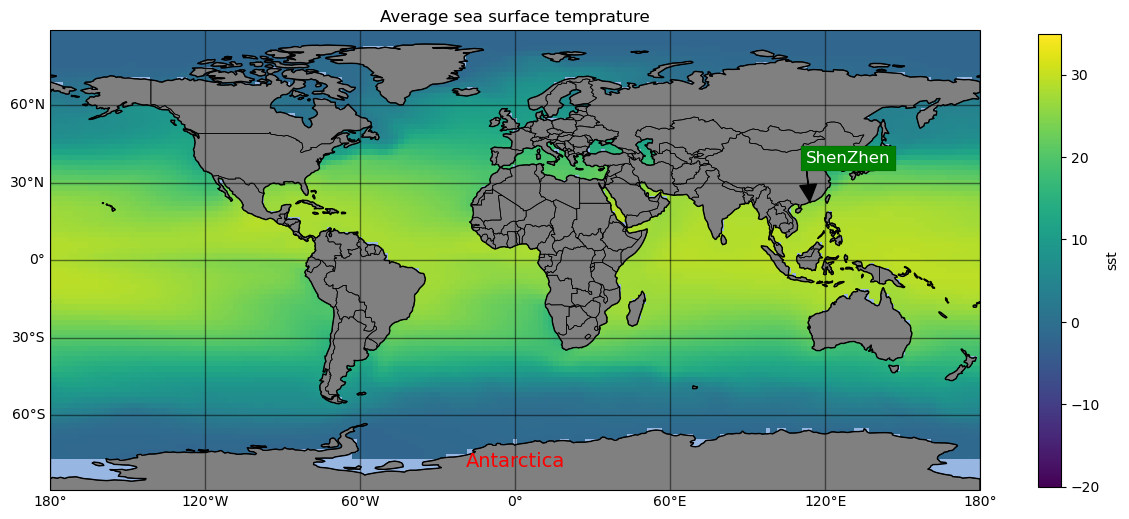

In [18]:
# Create and define the size of a figure object 
plt.figure(figsize=(15,15), dpi=100)

# Create an axes with an basic Robinson projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)
extent=[-180,180,-90,90]
#plot the tempratures
temp.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=-20, vmax=35, cbar_kwargs={'shrink': 0.4})
# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines
# Draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, draw_labels=True,color='black', alpha=0.5)
gl.xlabels_top = False #关闭上侧坐标显示
gl.ylabels_right = False #关闭右侧坐标显示

# Shenzhen location
central_lon, central_lat = 114.06, 22.54

# Manipulate latitude and longitude gridline numbers and spacing
#gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
#gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
plt.title("Average sea surface temprature")
plt.ylabel('sst(℃)')
#make an annotations, label the Shenzhen location
plt.annotate('ShenZhen', xy=(central_lon, central_lat), xytext=(central_lon+15, central_lat+15),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
#make a text,show the Antarctica location
plt.text(0.5, 0.05, "Antarctica", transform=plt.gca().transAxes, 
         fontsize=14, ha='center', color='red')
plt.show()